# Indicador IFGF e Proporção i/r
Os dados foram obtidos manualmente na plataforma sinconfi tratados em excel e calculado o indicador também em excel. Porém a quantidade de municípios varia de ano a ano, assim como não há continuidade das observações para todos os municípios. Logo, precisou remover os municípios com dados incompletos (2005-2016) e criar um novo conjunto de dados em série histórica com os outros municípios.

In [ ]:
import pandas as pd

In [ ]:
dados = {2005:0}#criando dicionário para passar os dados de cada aba do excel
for i in range(2005, 2017):
  dados[i] = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dados/Indicador_py.xlsx", sheet_name= str(i))#importando arquivo excel com os dados
  dados[i]["Ano"] = i# i é a variável ano e nome da aba do aqrquivo excel
for t in range(2013, 2017):
  dados[t].rename(columns={"Instituição": "MUNICIPIO"}, inplace = True)#renomeando colunas depois de 2013. A coluna com os municípios precisam ser iguais

In [ ]:
#identificando a menor observação dentre os anos
for i in range(2005,2017):
  print(dados[i].index)

RangeIndex(start=0, stop=182, step=1)
RangeIndex(start=0, stop=211, step=1)
RangeIndex(start=0, stop=207, step=1)
RangeIndex(start=0, stop=192, step=1)
RangeIndex(start=0, stop=212, step=1)
RangeIndex(start=0, stop=210, step=1)
RangeIndex(start=0, stop=200, step=1)
RangeIndex(start=0, stop=160, step=1)
RangeIndex(start=0, stop=200, step=1)
RangeIndex(start=0, stop=206, step=1)
RangeIndex(start=0, stop=196, step=1)
RangeIndex(start=0, stop=180, step=1)


### Trabalhando com todas as observações possíveis

In [ ]:
var = ["MUNICIPIO", "IFGF investimento"] #Separando somente as colunas necessárias (precisa ser em tupla)
IFGF_inv_full = {2005:0}#criando outro dicinário
for i in range(2005,2017):
  IFGF_inv_full[i] = dados[i][var]

In [ ]:
for i in range(2005,2017):
  IFGF_inv_full[i].rename(columns = {"IFGF investimento" : str(i)}, inplace = True)

In [ ]:
#juntando todas os anos em um só dataframe
m=pd.merge(IFGF_inv_full[2005], IFGF_inv_full[2006], how="outer", on="MUNICIPIO")
for i in range(2007,2017):
  m = pd.merge(m, IFGF_inv_full[i], how="outer", on="MUNICIPIO")

m.reset_index(drop=True, inplace=True)#reorganizando o indice

In [ ]:
m.to_excel("IFGF_inv_full.xlsx")

### Removendo valores com anos incompletos

In [ ]:
var = ["Ano", "MUNICIPIO","Proporção i/r", "IFGF investimento"] #Separando somente as colunas necessárias (precisa ser em tupla)
dpropi_r = {2005:0}#criando outro dicinário
for i in range(2005,2017):
  dpropi_r[i] = dados[i][var]

In [ ]:
#juntando todas os anos em um só dataframe
m=pd.concat([dpropi_r[2005], dpropi_r[2006]]).sort_values (by = 'MUNICIPIO')
for i in range(2007,2017):
  m = pd.concat([m, dpropi_r[i]]).sort_values(by = "MUNICIPIO")

In [ ]:
m.reset_index(drop=True, inplace=True)#reorganizando o indice
munit = m["MUNICIPIO"].unique()#criando lista de municípios existentes.

In [ ]:
#Criando um condicional para remover os municípios que n atendem os requisitos da série histórica (2005-2016)
for i in munit:
  if len(m.query("MUNICIPIO == @i").index) != 12:#contando o numero de linhas
    m.drop(m.loc[m['MUNICIPIO'] == i ].index, inplace = True)
# se a quantidade de observações do município for diferente de 12, todas as observações do município serão removidas.

outro df

In [ ]:
munit2 = m["MUNICIPIO"].unique()#nova lista de municípios, que atenderam o requsito (2005 - 2016)
len(munit2)#quantidade de municípios que atende a todos os anos

86

### Proporção i/r

In [ ]:
#criando um novo datafrrame para salvar as observações
prop = pd.DataFrame(index=(range(2005,2017)))#criando o indice
for i in munit2:
  prop[i] = tuple(m.query("MUNICIPIO == @i").sort_values(by = "Ano")["Proporção i/r"]) #no query o uso do '@' é para identificar a variável i

### IFGF investimento

In [ ]:
#criando um novo datafrrame para salvar as observações
IFGF = pd.DataFrame(index=(range(2005,2017)))#criando o indice
for i in munit2:
  IFGF[i] = tuple(m.query("MUNICIPIO == @i").sort_values(by = "Ano")["IFGF investimento"]) #no query o uso do '@' é para identificar a variável i

### Exportando para excel

In [ ]:
arq_xlsx = pd.ExcelWriter("Municipios_IFGF_MA.xlsx")

In [ ]:
IFGF.to_excel(arq_xlsx, sheet_name="IFGF1")
IFGF.T.to_excel(arq_xlsx, sheet_name="IFGF2")
prop.to_excel(arq_xlsx, sheet_name="Prop")
prop.T.to_excel(arq_xlsx, sheet_name="Prop1")
arq_xlsx.save()

# IFDM

In [ ]:
daods_ifdm = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dados/Evolu__o do IFDM Geral - 2005 a 2016.xlsx")

In [ ]:
daods_ifdm.query("UF == 'MA'", inplace= True)
daods_ifdm.drop(columns="UF", inplace=True)
daods_ifdm.reset_index(drop=True, inplace=True)
daods_ifdm.rename(columns={'Municipio':'MUNICIPIO'}, inplace=True)
#daods_ifdm.set_index("MUNICIPIO", inplace=True)

In [ ]:
daods_ifdm.to_excel("IFDM_full.xlsx")

In [ ]:
IFDM = pd.DataFrame(index=(range(2005,2017)))
for i in munit2:
  IFDM[i] = tuple(daods_ifdm.loc[i])

In [ ]:
IFDM.T.to_excel("IFDM_86.xlsx")

In [ ]:
IFDM_dados = IFDM.T

# Gráficos em mapas de calor do Maranhão

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as se

In [ ]:
geodados = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Dados/MA_Municipios_2021/MA_Municipios_2021.shp")

### IFGF

In [ ]:
IFGF_dados = IFGF.T.reset_index()
IFGF_dados.rename(columns={"index":"NM_MUN"}, inplace=True)

In [ ]:
IFGF_dados_geo = pd.merge(geodados, IFGF_dados, how="left", on = "NM_MUN")

artigo muito útil de graficos e loops
https://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/

cor: https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

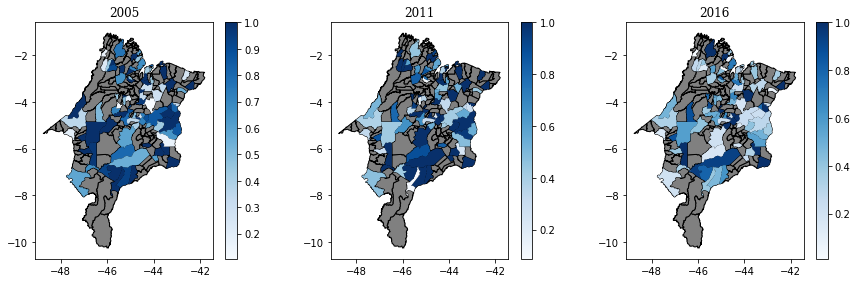

In [ ]:
plt.figure(figsize=(15,20), facecolor='w')
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
for i in enumerate((2005,2011,2016)):
  ax1 = plt.subplot(4,3,i[0]+1)
  IFGF_dados_geo.plot(i[1], legend = True, cmap = 'Blues', ax = IFGF_dados_geo.plot(color='grey', edgecolor='black', ax = ax1))
  plt.title(i[1], fontdict= font)
plt.show()

### IFDM

In [ ]:
IFDM_dados.reset_index(inplace=True)
IFDM_dados.rename(columns={"index":"NM_MUN"}, inplace=True)

In [ ]:
IFDM_dados_geo = pd.merge(geodados, IFDM_dados, how="left", on = "NM_MUN")

In [ ]:
import numpy as np

In [ ]:
#trocando os * por NAs
for i in range(2005,2017):
  IFDM_dados_geo[i].replace('*', np.nan, inplace = True)

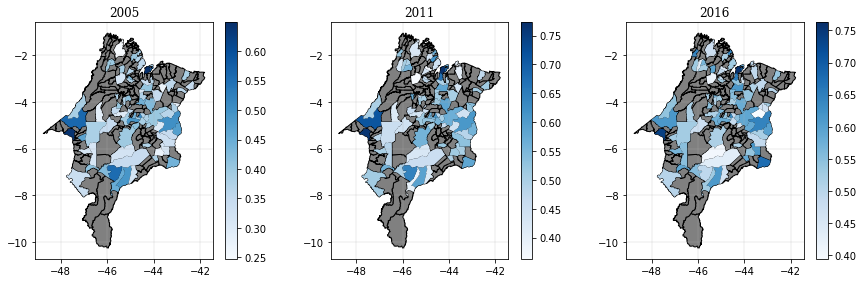

In [ ]:
plt.figure(figsize=(15,20), facecolor='w')
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
plt.title("teste")
for i in enumerate((2005,2011,2016)):
  ax1 = plt.subplot(4,3,i[0]+1)
  ax1.grid(linewidth=0.25)
  IFDM_dados_geo.plot(i[1], legend = True, cmap = 'Blues', ax = IFDM_dados_geo.plot(color='grey', edgecolor='black', ax = ax1))
  plt.title(i[1], fontdict= font)
plt.show()